In [1]:
%matplotlib inline
import numpy as np, seaborn as sns, pandas as pd, qiime2 as q2
import matplotlib.pyplot as plt

from biom import Table

def load_mf(fn, index='#SampleID'):
    _df = pd.read_csv(fn, sep='\t', dtype='str', na_values=[], keep_default_na=False)
    _df.set_index(index, inplace=True)
    return _df

In [2]:
cd trimmed-150nts/

/Users/yoshikivazquezbaeza/Documents/PDF/KnightLaboratory/HastyWater/trimmed-150nts


In [44]:
original = q2.Artifact.load('table-deblur.qza').view(pd.DataFrame)
normalized = q2.Artifact.load('feature-table.normalized.qza').view(pd.DataFrame)

discardable = q2.Artifact.load('feature-table.acinetos.normalization-features.qza').view(pd.DataFrame)

In [45]:
mf = load_mf('mapping-file.alpha.tsv')

In [47]:
df = pd.concat([
    normalized.sum(axis=1),
    original.sum(axis=1),
    pd.to_numeric(mf.day),
    original[discardable.columns].sum(axis=1)
], axis=1, keys=['normalized', 'original', 'day', 'acinetobacteria'])

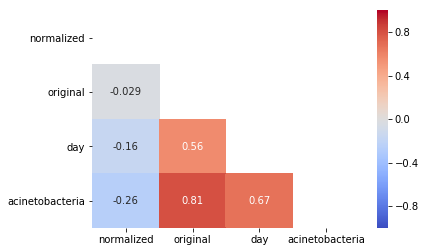

In [53]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask, vmin=-1, vmax=1, cmap='coolwarm')

/Users/yoshikivazquezbaeza/miniconda/envs/qiime2-2018.4/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


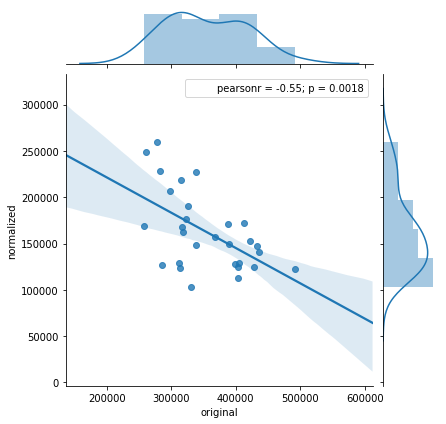

In [8]:
sns.jointplot('original', 'normalized', kind='reg', data=df)

Text(0.5,0,'Day')

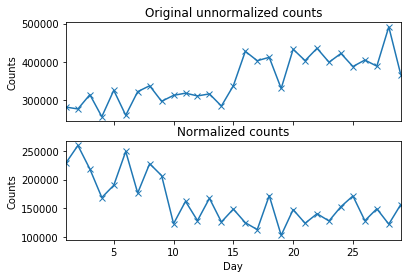

In [24]:
f, (ax, bx) = plt.subplots(2, sharex=True)

ax.plot(np.linspace(1, 29, 29), df['original'], marker='x')
ax.set_title('Original unnormalized counts')
ax.set_xlim(1, 29)
ax.set_ylabel('Counts')

bx.plot(np.linspace(1, 29, 29), df['normalized'], marker='x')
bx.set_title('Normalized counts')
bx.set_xlim(1, 29)

bx.set_ylabel('Counts')
bx.set_xlabel('Day')